# Exploratory Data Analysis & Intro

# Goal
- Investigate top-paying roles and skills in the data science industry.
- Use Python to explore a real-live dataset on job postings.
- For job-seekers: use these insights to help find the best job opportunities.

# Final Deliverables:

- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & LinkedIn.

# Questions to Answer
- What are the most demanded skills for the top 3 most popular data roles?
- How are in-demand skills trending for Data Analysts?
- How well do jobs and skills pay for Data Analysts?
- What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)
- I'll be focusing on Germany Data Analyst roles.

In [ ]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("Lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\User\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df_DA_GER = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst')]


In [ ]:
import seaborn as sns

In [ ]:
df_DA_GER['job_location'] = df_DA_GER['job_location'].replace('Germany', 'Anywhere')


C:\Users\User\AppData\Local\Temp\ipykernel_22164\2901758302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_GER['job_location'] = df_DA_GER['job_location'].replace('Germany', 'Anywhere')


In [ ]:
df_DA_GER

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
141,Data Analyst,Data Analyst & Process Developer (m/w/d),"Mettlach, Germany",via WTRF Jobs,Full-time,False,Germany,2023-05-02 13:24:54,True,False,Germany,None,NaN,NaN,Villeroy & Boch AG Hauptverwaltung,"[typescript, html, css, javascript, angular, sap]","{'analyst_tools': ['sap'], 'programming': ['ty..."
142,Data Analyst,Data Analyst (m/f/d),"Nuremberg, Germany",via Big Country Jobs,Full-time,False,Germany,2023-01-19 14:05:05,False,False,Germany,None,NaN,NaN,Symanto,"[python, r, sql, azure, power bi, excel, power...","{'analyst_tools': ['power bi', 'excel', 'power..."
175,Data Analyst,German speaking Data Analyst,"Bremen, Germany",via BeBee,Temp work,False,Germany,2023-11-19 13:17:23,False,False,Germany,None,NaN,NaN,Hito High Professionals GmbH,"[sap, excel]","{'analyst_tools': ['sap', 'excel']}"
220,Data Analyst,Inhouse Junior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-21 14:02:06,True,False,Germany,None,NaN,NaN,NEW YORKER Group-Services International GmbH &...,[windows],{'os': ['windows']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785168,Data Analyst,Data Analyst COO Business Management,Anywhere,via BeBee,Full-time,False,Germany,2023-11-09 06:38:25,False,False,Germany,None,NaN,NaN,EON Energie Deutschland,"[sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
785176,Data Analyst,Data Analyst (m/w/d),"Düsseldorf, Germany",via XING,Full-time,False,Germany,2023-01-05 06:41:51,True,False,Germany,None,NaN,NaN,Goodman Masson GmbH,"[python, r, sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
785357,Data Analyst,Data Analyst (m/w/d),"Jena, Jerman",melalui XING,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,linimed Gruppe,"[sql, julia, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra..."
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


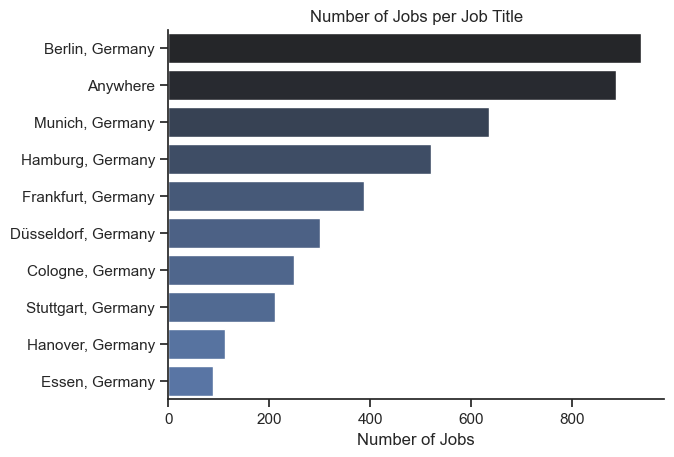

In [ ]:
df_plot = df_DA_GER['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


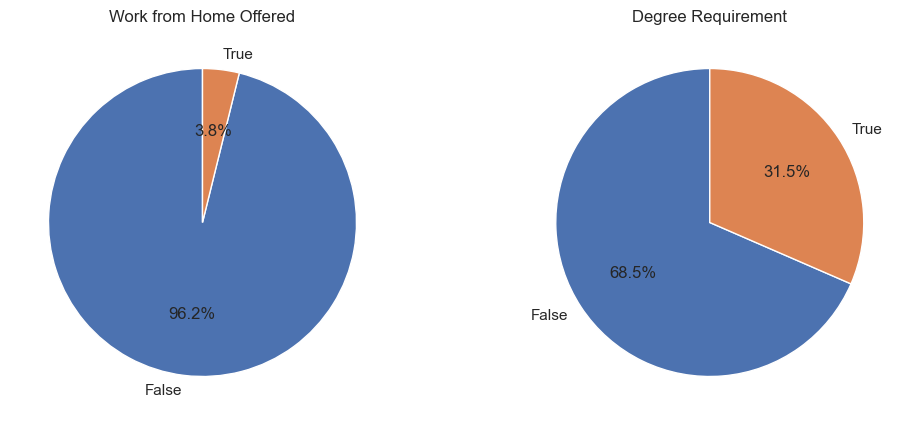

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement'
}

fig, ax = plt.subplots(1, 2, figsize=(11, 3.5))
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_GER[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

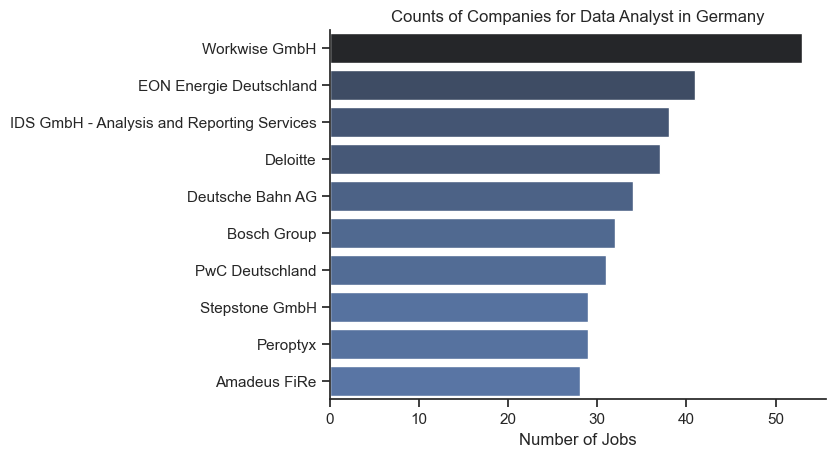

In [ ]:
df_plot = df_DA_GER['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()